In [4]:
from sklearn.linear_model import LogisticRegression

In [82]:
import numpy as np 
import matplotlib.pyplot as plt
np.random.seed(2)

X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])
X_1 = X.T
# extended data 
X = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)

In [70]:
X

array([[1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ],
       [0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 1.75, 2.  , 2.25, 2.5 , 2.75,
        3.  , 3.25, 3.5 , 4.  , 4.25, 4.5 , 4.75, 5.  , 5.5 ]])

In [27]:
y.shape

(20,)

In [28]:
X[:, 1].reshape(2, 1)

array([[1.  ],
       [0.75]])

In [29]:
def sigmoid(s):
    return 1/(1 + np.exp(-s))    # Hàm sigmoid

def logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-3, max_count = 10000):   
    w = [w_init]      # Tạo list lưu trữ w
#     it = 0            
    N = X.shape[1]    # Số phần tử của x
    d = X.shape[0]    # Số các (feature+1) của X
    count = 0         # Đếm các lần duyệt qua các phần tử 
    check_w_after = 20   # Cứ sau 20 lần duyệt các phần tử lại so sánh với điều kiện dừng
    while count < max_count:   
        
        # mix data 
        mix_id = np.random.permutation(N)   # Trộn dữ liệu đảm bảo tính ngẫu nhiên cho SGD
        
        for i in mix_id:                    
            xi = X[:, i].reshape(d, 1)      # Chọn từng cột của X rồi reshape lại để có thể nhân ma trận với w
            yi = y[i]                         
            zi = sigmoid(np.dot(w[-1].T, xi)) # Tính zi là hàm sigmoid nhận đầu vào là w.T x X
            w_new = w[-1] + eta*(yi - zi)*xi  # Cập nhật lại w theo SGD
            count += 1                         
            # stopping criteria
            
            if count%check_w_after == 0:    # nếu count là bội của điều kiện check thì thực hiện bên trong if
                print(count)
#                 print(len(w))
                if np.linalg.norm(w_new - w[-check_w_after])/len(w_init) < tol:    # Nếu nhỏ hơn tol thì tức là nghiệm hội tụ chấp nhận được 
                    return w
            w.append(w_new)    
    return w
eta = .05       # learning rate = 0.05
d = X.shape[0]  
w_init = np.random.randn(d, 1)

w = logistic_sigmoid_regression(X, y, w_init, eta)
print(w[-1])

20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
980
1000
1020
1040
1060
1080
1100
1120
1140
1160
1180
1200
1220
1240
1260
1280
1300
1320
1340
1360
1380
1400
1420
1440
1460
1480
1500
1520
1540
1560
1580
1600
1620
1640
1660
1680
1700
1720
1740
1760
1780
1800
1820
1840
1860
1880
1900
1920
1940
1960
1980
2000
2020
2040
2060
2080
2100
2120
2140
2160
2180
2200
2220
2240
2260
2280
2300
2320
2340
2360
2380
2400
2420
2440
2460
2480
2500
2520
2540
2560
2580
2600
2620
2640
2660
2680
2700
2720
2740
2760
2780
2800
2820
2840
2860
2880
2900
2920
2940
2960
2980
3000
3020
3040
3060
3080
3100
3120
3140
3160
3180
3200
3220
3240
3260
3280
3300
3320
3340
3360
3380
3400
3420
3440
3460
3480
3500
3520
3540
3560
3580
3600
3620
3640
3660
3680
3700
3720
3740
3760
3780
3800
3820
3840
3860
3880
3900
3920
3940
3960
3980
4000
4020
4040
4060
4080
4100
4120
4140
4160
4180
4200
422

In [30]:
print(sigmoid(np.dot(w[-1].T, X)))

[[0.03320858 0.04690084 0.06585404 0.0917293  0.1263958  0.17168703
  0.17168703 0.22895408 0.2984405  0.37865905 0.46611392 0.55570256
  0.64181036 0.71964909 0.84046666 0.8830046  0.91534269 0.93935626
  0.95687912 0.9785144 ]]


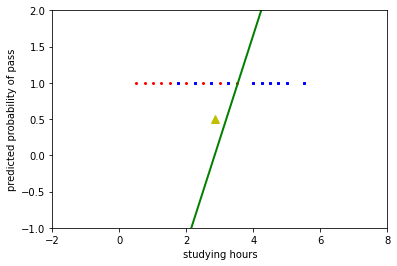

In [118]:
X0 = X[1, np.where(y == 0)][0]
y0 = y[np.where(y == 0)]
X1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]
plt.plot(X0, np.ones_like(X0) , 'ro', markersize = 2)
plt.plot(X1, np.ones_like(X1), 'bs', markersize = 2)

xx = np.linspace(0, 6, 1000)
w0 = w[-1][0][0]
w1 = w[-1][1][0]
threshold = -w0/w1
yy = w0 + w1*xx
plt.axis([-2, 8, -1, 2])
plt.plot(xx, yy, 'g-', linewidth = 2)
plt.plot(threshold, .5, 'y^', markersize = 8)
plt.xlabel('studying hours')
plt.ylabel('predicted probability of pass')
plt.show()


In [32]:
 np.where(y == 0)

(array([ 0,  1,  2,  3,  4,  5,  7,  9, 11, 13], dtype=int64),)

In [10]:
lst= [1,2,3]

In [120]:
X_1

array([[0.5 ],
       [0.75],
       [1.  ],
       [1.25],
       [1.5 ],
       [1.75],
       [1.75],
       [2.  ],
       [2.25],
       [2.5 ],
       [2.75],
       [3.  ],
       [3.25],
       [3.5 ],
       [4.  ],
       [4.25],
       [4.5 ],
       [4.75],
       [5.  ],
       [5.5 ]])

In [148]:
one = np.ones((X_1.shape[0], 1))
Xbar = np.concatenate((one, X_1), axis = 1)

In [149]:
Xbar

array([[1.  , 0.5 ],
       [1.  , 0.75],
       [1.  , 1.  ],
       [1.  , 1.25],
       [1.  , 1.5 ],
       [1.  , 1.75],
       [1.  , 1.75],
       [1.  , 2.  ],
       [1.  , 2.25],
       [1.  , 2.5 ],
       [1.  , 2.75],
       [1.  , 3.  ],
       [1.  , 3.25],
       [1.  , 3.5 ],
       [1.  , 4.  ],
       [1.  , 4.25],
       [1.  , 4.5 ],
       [1.  , 4.75],
       [1.  , 5.  ],
       [1.  , 5.5 ]])

In [133]:
Xbar

array([[1.  , 0.5 ],
       [1.  , 0.75],
       [1.  , 1.  ],
       [1.  , 1.25],
       [1.  , 1.5 ],
       [1.  , 1.75],
       [1.  , 1.75],
       [1.  , 2.  ],
       [1.  , 2.25],
       [1.  , 2.5 ],
       [1.  , 2.75],
       [1.  , 3.  ],
       [1.  , 3.25],
       [1.  , 3.5 ],
       [1.  , 4.  ],
       [1.  , 4.25],
       [1.  , 4.5 ],
       [1.  , 4.75],
       [1.  , 5.  ],
       [1.  , 5.5 ]])

In [46]:
X_1 = np.array(X_1)

In [47]:
X_1

array([[1.  , 0.5 ],
       [1.  , 0.75],
       [1.  , 1.  ],
       [1.  , 1.25],
       [1.  , 1.5 ],
       [1.  , 1.75],
       [1.  , 1.75],
       [1.  , 2.  ],
       [1.  , 2.25],
       [1.  , 2.5 ],
       [1.  , 2.75],
       [1.  , 3.  ],
       [1.  , 3.25],
       [1.  , 3.5 ],
       [1.  , 4.  ],
       [1.  , 4.25],
       [1.  , 4.5 ],
       [1.  , 4.75],
       [1.  , 5.  ],
       [1.  , 5.5 ]])

In [150]:
model = LogisticRegression(fit_intercept=False)

In [151]:
model.fit(Xbar, y)

LogisticRegression(fit_intercept=False)

In [152]:
model.predict(Xbar)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [153]:
y

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

In [157]:
w_x = model.coef_

In [159]:
model.score(Xbar, y)

0.8

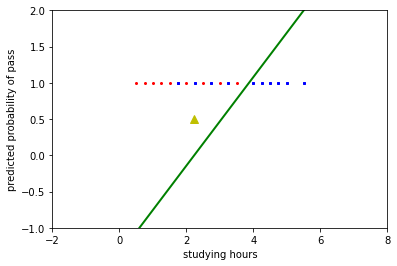

In [161]:
X0 = X[1, np.where(y == 0)][0]
y0 = y[np.where(y == 0)]
X1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]
plt.plot(X0, np.ones_like(X0) , 'ro', markersize = 2)
plt.plot(X1, np.ones_like(X1), 'bs', markersize = 2)

xx = np.linspace(0, 6, 1000)
w0 = w_x[0][0]
w1 = w_x[0][1]
threshold = -w0/w1
yy = w0+ w1*xx
plt.axis([-2, 8, -1, 2])
plt.plot(xx, yy, 'g-', linewidth = 2)
plt.plot(threshold, .5, 'y^', markersize = 8)
plt.xlabel('studying hours')
plt.ylabel('predicted probability of pass')
plt.show()

(150, 4)

(150,)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])